In [1]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from qtaim_embed.models.utils import load_graph_level_model_from_config
from qtaim_embed.utils.tests import get_dataset_graph_level
from qtaim_embed.data.dataloader import DataLoaderMoleculeGraphTask
from qtaim_embed.utils.data import get_default_graph_level_config
from qtaim_embed.core.dataset import HeteroGraphGraphLabelDataset


In [2]:
# import pandas as pd
# df = pd.read_pickle("../../../../data/splits_1205/test_qm9_qtaim_1205_labelled.pkl")


In [3]:
"""qtaim_keys = {
    "atom": ["extra_feat_atom_esp_total"],
    "bond": ["extra_feat_bond_esp_total", "extra_feat_bond_eta", "bond_length"],
    "global": ["homo", "lumo", "gap", "u0"],
}

qtaim_keys_mid = {
    "atom": [
        "extra_feat_atom_Lagrangian_K",
        "extra_feat_atom_Hamiltonian_K",
        "extra_feat_atom_e_density",
        "extra_feat_atom_lap_e_density",
        "extra_feat_atom_esp_total",
        "extra_feat_atom_det_hessian",
        "extra_feat_atom_eta",
        "extra_feat_atom_energy_density",
    ],
    "bond": [
        "extra_feat_bond_Lagrangian_K",
        "bond_length",
        "extra_feat_bond_Hamiltonian_K",
        "extra_feat_bond_e_density",
        "extra_feat_bond_lap_e_density",
        "extra_feat_bond_e_loc_func",
        "extra_feat_bond_esp_e",
        "extra_feat_bond_esp_total",
        "extra_feat_bond_grad_norm",
        "extra_feat_bond_lap_norm",
        "extra_feat_bond_ellip_e_dens",
        "extra_feat_bond_eta",
    ],
    "global": ["homo", "lumo", "gap", "u0"],
}
"""
qtaim_keys_high = {
    "atom": [
        "extra_feat_atom_Hamiltonian_K",
        "extra_feat_atom_e_density",
        "extra_feat_atom_lap_e_density",
        "extra_feat_atom_e_loc_func",
        "extra_feat_atom_ave_loc_ion_E",
        "extra_feat_atom_delta_g_promolecular",
        "extra_feat_atom_delta_g_hirsh",
        "extra_feat_atom_esp_nuc",
        "extra_feat_atom_esp_e",
        "extra_feat_atom_esp_total",
        "extra_feat_atom_grad_norm",
        "extra_feat_atom_lap_norm",
        "extra_feat_atom_eig_hess",
        "extra_feat_atom_det_hessian",
        "extra_feat_atom_ellip_e_dens",
        "extra_feat_atom_eta",
        "extra_feat_atom_energy_density",
        "extra_feat_atom_density_beta",
        "extra_feat_atom_density_alpha",
        "extra_feat_atom_lol",
    ],
    "bond": [
        "bond_length",
        "extra_feat_bond_Lagrangian_K",
        "extra_feat_bond_Hamiltonian_K",
        "extra_feat_bond_e_density",
        "extra_feat_bond_lap_e_density",
        "extra_feat_bond_e_loc_func",
        "extra_feat_bond_ave_loc_ion_E",
        "extra_feat_bond_delta_g_promolecular",
        "extra_feat_bond_delta_g_hirsh",
        "extra_feat_bond_esp_nuc",
        "extra_feat_bond_esp_e",
        "extra_feat_bond_esp_total",
        "extra_feat_bond_grad_norm",
        "extra_feat_bond_lap_norm",
        "extra_feat_bond_eig_hess",
        "extra_feat_bond_det_hessian",
        "extra_feat_bond_ellip_e_dens",
        "extra_feat_bond_eta",
        "extra_feat_bond_energy_density",
        "extra_feat_bond_lol",
    ],
    "global": ["homo", "lumo", "gap", "u0"],
}

base_dict = {
    "atom": [],
    "bond": ["bond_length"],
    "global": ["homo", "lumo", "gap", "u0"],
}

qm9_loc = "../../../../data/splits_1205/test_qm9_qtaim_1205_labelled.pkl"
qm9_train_loc = "../../../../data/splits_1205/train_qm9_qtaim_1205_labelled.pkl"

dataset_dict = {}
keys_list = [
    base_dict,
    # qtaim_keys,
    # qtaim_keys_mid,
    qtaim_keys_high,
]
for ind, feat_dict in enumerate(keys_list):
    if ind == 0:
        key = "base"
    elif ind == 1:
        key = "qtaim"
    # elif ind == 2:
    #    key = "qtaim_mid"
    # elif ind == 3:
    #    key = "qtaim_full"

    dataset_dict[key + "_test"] = HeteroGraphGraphLabelDataset(
        file=qm9_loc,
        allowed_ring_size=[3, 4, 5, 6, 7],
        allowed_charges=None,
        allowed_spins=None,
        self_loop=True,
        extra_keys=feat_dict,
        target_list=["homo", "lumo", "gap", "u0"],
        extra_dataset_info={},
        debug=False,
        log_scale_features=False,
        log_scale_targets=False,
        standard_scale_features=True,
        standard_scale_targets=True,
    )


... > creating MoleculeWrapper objects


100%|██████████| 13385/13385 [00:01<00:00, 12114.66it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'F', 'C', 'H', 'O', 'N'}
selected atomic keys []
selected bond keys ['bond_length']
selected global keys ['homo', 'lumo', 'gap', 'u0']
... > Building graphs and featurizing


100%|██████████| 13385/13385 [00:24<00:00, 545.61it/s]


included in labels
{'global': ['homo', 'lumo', 'gap', 'u0']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_F', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_O', 'chemical_symbol_N'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'bond_length'], 'global': ['num atoms', 'num bonds', 'molecule weight']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 13385/13385 [00:00<00:00, 34192.99it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [1.47140089e+00 3.40008814e-01 6.37004640e-02 8.83042589e-03
 2.40550114e-02 2.21176392e-02 7.37116059e-03 1.32622686e-03
 1.54657177e-03 3.51400229e-01 5.10526666e-01 7.81974956e-02
 5.83290373e-02]
std [1.62828102 0.65403393 0.24421858 0.09355453 0.15322    0.14706614
 0.08553845 0.03639324 0.03929605 0.4774077  0.49988918 0.26848212
 0.23436459]
mean [0.         0.08284884 0.01148897 0.03147444 0.02886136 0.00970952
 0.0019077  1.61197566]
std [0.         0.2756536  0.10656911 0.17459609 0.1674168  0.09805734
 0.04363558 0.8020708 ]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [ 17.97026522  13.98102353 122.78646123]
std [2.92700596 1.92118092 7.48107923]
... > Scaling features complete
... > feature mean(s): 
 {'atom': tensor([1.4714e+00, 3.4001e-01, 6.3700e-02, 8.8304e-03, 2.4055e

100%|██████████| 13385/13385 [00:04<00:00, 2677.28it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'F', 'C', 'H', 'O', 'N'}
selected atomic keys ['extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density', 'extra_feat_atom_density_beta', 'extra_feat_atom_density_alpha', 'extra_feat_atom_lol']
selected bond keys ['bond_length', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_bond_delta_g_promolecular', 'ext

100%|██████████| 13385/13385 [00:26<00:00, 497.89it/s]


included in labels
{'global': ['homo', 'lumo', 'gap', 'u0']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_F', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_O', 'chemical_symbol_N', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_energy_density', 'extra_feat_atom_density_beta', 'extra_feat_atom_density_alpha', 'extra_feat_atom_lol'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'rin

100%|██████████| 13385/13385 [00:00<00:00, 33707.71it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Scaling features
mean [ 1.47140089e+00  3.40008814e-01  6.37004640e-02  8.83042589e-03
  2.40550114e-02  2.21176392e-02  7.37116059e-03  1.32622686e-03
  1.54657177e-03  3.51400229e-01  5.10526666e-01  7.81974956e-02
  5.83290373e-02  5.47964044e+04 -5.47964044e+04 -2.19156678e+05
  9.99797256e-01  5.79463984e+00  8.76137607e-02  1.57237750e-01
  8.24175851e+05 -2.18401671e+01  8.24154011e+05  1.52082190e-11
 -2.19156678e+05 -2.19156678e+05 -5.77131614e+15  6.55860792e-04
 -1.09257501e+00 -5.47964044e+04  3.64157744e+01  3.64157744e+01
  9.91284506e-01]
std [1.62828102e+00 6.54033927e-01 2.44218580e-01 9.35545267e-02
 1.53219998e-01 1.47066139e-01 8.55384509e-02 3.63932409e-02
 3.92960543e-02 4.77407696e-01 4.99889177e-01 2.68482117e-01
 2.34364589e-01 8.22243443e+04 8.22243443e+04 3.28841776e+05
 6.07750992e-04 5.88967063e+00 4.86482887e-02 1.05742399e-01
 2.09159

In [4]:
for k, v in dataset_dict.items():
    print(k, v.feature_size())


base_test {'atom': 13, 'bond': 8, 'global': 3}
qtaim_test {'atom': 33, 'bond': 27, 'global': 3}


In [7]:
def test_and_predict(dataset_test, model):
    statistics_dict = {}

    ### Test set
    data_loader = DataLoaderMoleculeGraphTask(
        dataset_test, batch_size=len(dataset_test.graphs), shuffle=False
    )
    batch_graph, batched_labels = next(iter(data_loader))
    r2_pre, mae, mse, preds_unscaled, labels_unscaled = model.evaluate_manually(
        batch_graph,
        batched_labels,
        scaler_list=dataset_test.label_scalers,
    )
    r2_pre = r2_pre.numpy()
    mae = mae.numpy()
    rmse = mse.numpy()

    print(
        "Performance test set:\t r2: {}\t mae: {}\t rmse: {}".format(r2_pre, mae, rmse)
    )
    print("--" * 50)
    statistics_dict["test"] = {"r2": r2_pre, "mae": mae, "rmse": mse}
    # preds_test = model.forward(batch_graph, batch_graph.ndata["feat"])
    # preds_test = preds_test.detach().numpy()
    # label_list = [i.ndata["labels"]["global"].tolist()[0] for i in dataset_test.graphs]

    return preds_unscaled, labels_unscaled, statistics_dict


In [10]:
results_dict = {
    "no_qtaim": {"test_r2": -100},
    "qtaim": {"test_r2": -100},
    "qtaim_mid": {"test_r2": -100},
    "qtaim_full": {"test_r2": -100},
}

model_root = "../../../../data/saved_models/0114/qm9/mean/"
model_root_qtaim = "../../../../data/saved_models/0114/qm9/bl/"
models_no_qtaim = os.listdir(model_root)
models_qtaim = os.listdir(model_root_qtaim)
models = models_no_qtaim + models_qtaim

results_dict = {
    "qtaim": {"test_r2": -100},
}


In [11]:
for ind, model in enumerate(models):
    # load model
    if ind < len(models_no_qtaim):
        model_loc = model_root + model
    else:
        model_loc = model_root_qtaim + model
    print(model_loc)
    model_config = {"model": {"restore": True, "restore_path": model_loc}}
    model = load_graph_level_model_from_config(model_config["model"])
    model.cpu()
    atom_size = model.hparams["atom_input_size"]
    bond_size = model.hparams["bond_input_size"]

    if atom_size == 12:
        str_dataset = "base"
        dataset_test_base = dataset_dict["base_test"]

    if atom_size == 33:
        str_dataset = "qtaim"
        dataset_test_base = dataset_dict["qtaim_test"]

    print(str_dataset, atom_size, bond_size)

    (
        preds_test,
        label_list,
        statistics_dict,
    ) = test_and_predict(dataset_test_base, model)
    if (
        np.array(statistics_dict["test"]["r2"]).mean()
        > np.array(results_dict[str_dataset]["test_r2"]).mean()
    ):
        results_dict[str_dataset]["test_r2"] = statistics_dict["test"]["r2"]
        results_dict[str_dataset]["test_preds"] = preds_test
        results_dict[str_dataset]["test_labels"] = label_list
        results_dict[str_dataset]["test_mae"] = statistics_dict["test"]["mae"]
        results_dict[str_dataset]["test_rmse"] = statistics_dict["test"]["rmse"]
        results_dict[str_dataset]["model_loc"] = model_loc
        results_dict[str_dataset]["model"] = model


../../../../data/saved_models/0114/qm9/mean/model_lightning_epoch=364-val_loss=0.0753.ckpt
:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 36
... > number of tasks: 4
:::MODEL LOADED:::
qtaim 33 27
Performance test set:	 r2: [0.6288798  0.89314586 0.81114775 0.9493489 ]	 mae: [0.01032945 0.01094289 0.01469377 5.5894775 ]	 rmse: [0.01341594 0.01525155 0.02052923 8.956829  ]
----------------------------------------------------------------------------------------------------
../../../../data/saved_models/0114/qm9/mean/model_lightning_epoch=248-val_loss=0.0859.ckpt
:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 75
... > number of tasks: 4
:::MODEL LOADED:::
qtaim 33 27
Performance test set:	 r2: [0.6287292  0.9102231  0.85628706 0.967656  ]	 mae: [0.01035171 0.01006804 0.01366284 5.109846  ]	 rmse: [0.01341866 0.01397979 0.01790851 7.1574225 ]
----------------------------------------------------------------------------------------------------
../../../../data/saved_model

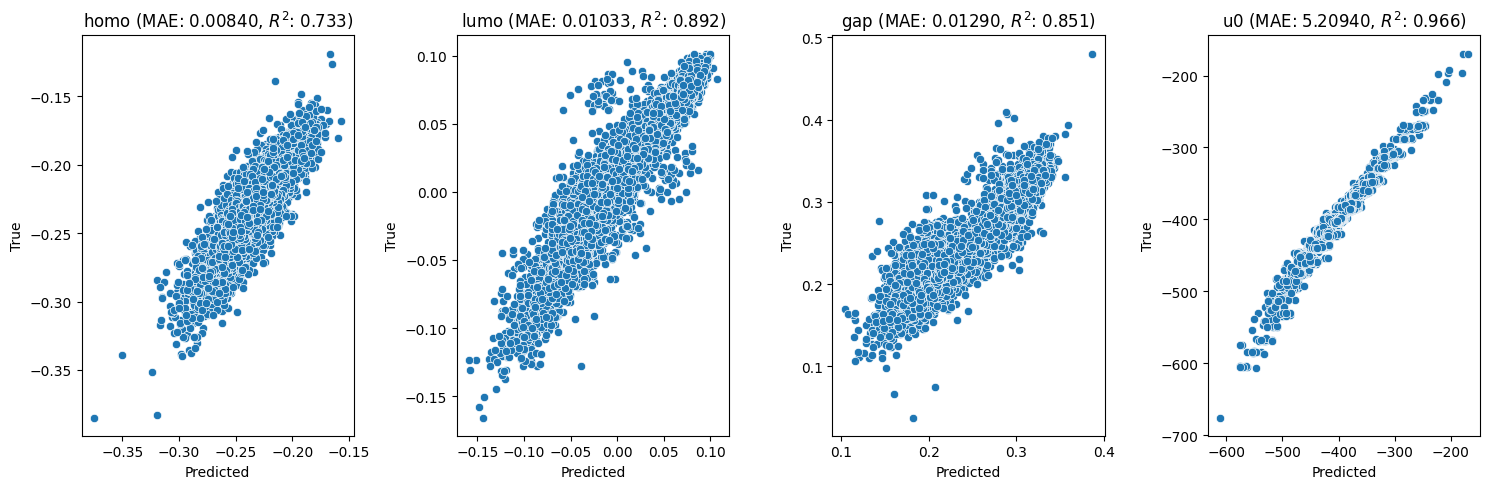

In [12]:
name_list = ["homo", "lumo", "gap", "u0"]
# plot each as a subplot of scatter plots
best_label_array = np.array(results_dict["qtaim"]["test_labels"])
best_preds_test = results_dict["qtaim"]["test_preds"]
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    sns.scatterplot(x=best_preds_test[:, i], y=best_label_array[:, i], ax=ax[i])
    ax[i].set_title(
        "{} (MAE: {:.5f}, $R^2$: {:.3f})".format(
            name_list[i],
            results_dict["qtaim"]["test_mae"][i],
            results_dict["qtaim"]["test_r2"][i],
        )
    )
    ax[i].set_xlabel("Predicted")
    ax[i].set_ylabel("True")
    # ax[i].set_xlim(-10, 10)
    # ax[i].set_ylim(-10, 10)
    # ax[i].plot([-10, 10], [-10, 10], color="black", linestyle="--")
fig.tight_layout()
